In [ ]:
%cd /content/drive/MyDrive/ML4CV Feb 2022/Day 6

/content/drive/.shortcut-targets-by-id/1SNizRuPhNSDIr43N7xL0GtAA23B__fye/ML4CV Feb 2022/Day 6


In [ ]:
from tensorflow import keras
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data = datagen.flow_from_directory('/content/drive/MyDrive/FDP Feb 2022/practice/split_data/train',
                                         target_size=(224,224), 
                                         batch_size=8, class_mode='categorical', shuffle=True)

Found 324 images belonging to 2 classes.


In [ ]:
valid_data = datagen.flow_from_directory('/content/drive/MyDrive/FDP Feb 2022/practice/split_data/val',
                                         target_size=(224,224), 
                                         batch_size=8, class_mode='categorical', shuffle=False)

Found 40 images belonging to 2 classes.


In [ ]:
test_data = datagen.flow_from_directory('/content/drive/MyDrive/FDP Feb 2022/practice/split_data/test',
                                         target_size=(224,224), 
                                         batch_size=8, class_mode='categorical', shuffle=False)

Found 42 images belonging to 2 classes.


In [ ]:
vgg16_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg16_model.trainable = False

In [ ]:
vgg16_output = vgg16_model.layers[-1].output
gap_layer = keras.layers.GlobalAveragePooling2D()(vgg16_output)
output = keras.layers.Dense(2, activation='softmax')(gap_layer)

vgg16_newmodel = keras.models.Model(inputs=vgg16_model.input, outputs= output)
vgg16_newmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
vgg16_newmodel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
output = vgg16_newmodel.fit(train_data, batch_size=8, epochs=2, validation_data=valid_data)

Epoch 1/2
41/41 [==============================] - 254s 6s/step - loss: 0.7624 - accuracy: 0.5000 - val_loss: 0.7379 - val_accuracy: 0.5000
Epoch 2/2
41/41 [==============================] - 215s 5s/step - loss: 0.7065 - accuracy: 0.5000 - val_loss: 0.6988 - val_accuracy: 0.5000


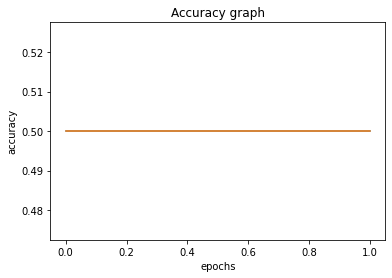

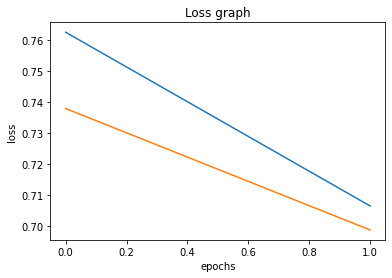

In [ ]:
import matplotlib.pyplot as plt
acc= output.history['accuracy']
val_acc= output.history['val_accuracy']

loss= output.history['loss']
val_loss= output.history['val_loss']


plt.plot(acc, label='training accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
vgg16_newmodel.evaluate(test_data)

6/6 [==============================] - 25s 4s/step - loss: 0.7109 - accuracy: 0.5000


[0.7109231948852539, 0.5]

In [ ]:
pip install keract

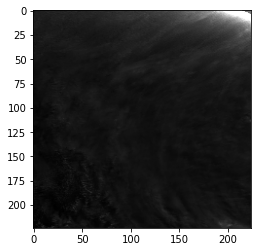

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/FDP Feb 2022/practice/split_data/test/smoke/168.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img/255.0
plt.imshow(img)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
from keract import get_activations
activation = get_activations(vgg16_newmodel, img.reshape(1,224,224,3), layer_names='block1_conv1', auto_compile=True)
print(activation)

{'block1_conv1': array([[[[0.40634966, 0.11528899, 0.06329195, ..., 1.1802704 ,
          0.5596636 , 0.47953266],
         [0.49041903, 0.11313306, 0.13180271, ..., 1.1091931 ,
          0.77837175, 0.61922324],
         [0.46933308, 0.11326422, 0.12239857, ..., 1.107087  ,
          0.7655108 , 0.5996627 ],
         ...,
         [0.        , 0.18372159, 0.3418927 , ..., 0.43460876,
          1.6024451 , 1.0395453 ],
         [0.        , 0.18420868, 0.34180266, ..., 0.43368876,
          1.605391  , 1.0403779 ],
         [0.74147564, 0.15732363, 0.6473925 , ..., 0.8054894 ,
          2.2570477 , 1.7991606 ]],

        [[0.5212721 , 0.12150908, 0.03154092, ..., 1.1040387 ,
          0.33754313, 0.35680538],
         [0.7387004 , 0.1155083 , 0.11299958, ..., 0.9950189 ,
          0.5290767 , 0.4933007 ],
         [0.67762816, 0.11772782, 0.10287523, ..., 0.98882157,
          0.5193452 , 0.47511292],
         ...,
         [0.67241293, 0.19328998, 0.32213125, ..., 0.        ,
        

block1_conv1 (1, 224, 224, 64) 


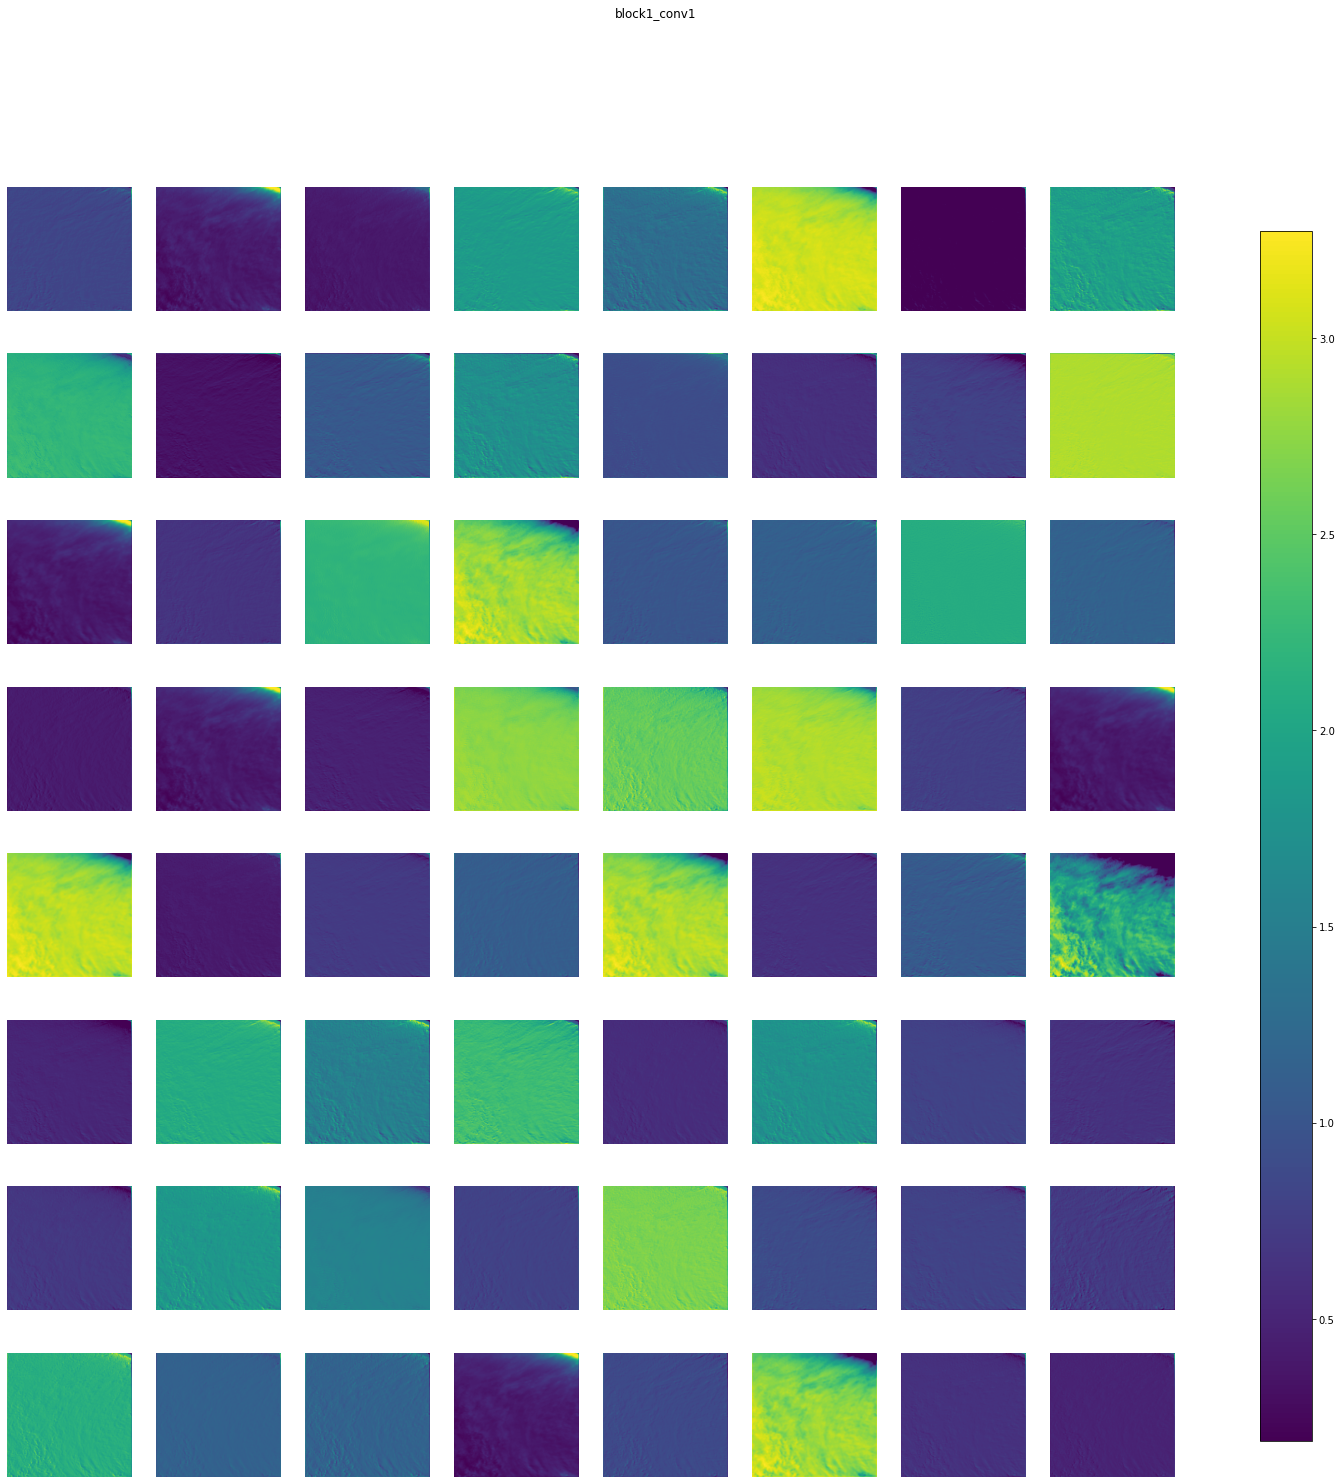

In [ ]:
import keract
keract.display_activations(activation)